In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [8]:
import numpy as np
import torch
import random

from scipy import stats
from itertools import permutations

In [121]:
def random_perms(size, n=10000):
    perms = [np.random.permutation(size) for _ in range(n)]
    kts = [stats.kendalltau(range(size), p).correlation for p in perms]
    return np.array(perms), np.array(kts)

In [126]:
%time perms, kts = random_perms(5)

CPU times: user 2.42 s, sys: 29.5 ms, total: 2.45 s
Wall time: 2.44 s


In [127]:
kts[:10]

array([ 0.6,  0.4, -0.4,  0. ,  0. , -0.2,  0. , -0.2, -0.6, -0.2])

In [128]:
perms[:10]

array([[0, 3, 1, 2, 4],
       [0, 2, 3, 4, 1],
       [2, 4, 3, 0, 1],
       [0, 3, 4, 2, 1],
       [3, 2, 0, 1, 4],
       [3, 2, 1, 0, 4],
       [2, 0, 4, 3, 1],
       [3, 2, 1, 0, 4],
       [2, 4, 3, 1, 0],
       [3, 4, 0, 1, 2]])

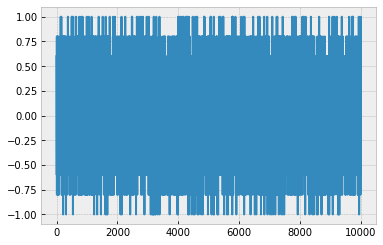

In [129]:
plt.plot(kts)

In [70]:
kt_idx_sort = kts.argsort()

In [71]:
kts[kt_idx_sort][0]

-0.91111111111111098

In [133]:
def swap_perms(size, n=1000):
    
    perms = []
    kts = []

    seq = list(range(size))

    for _ in range(n):
        i = random.randint(0, size-2)
        seq[i], seq[i+1] = seq[i+1], seq[i]
        kt, _ = stats.kendalltau(range(size), seq)
        perms.append(list(seq))
        kts.append(kt)
            
    return perms, kts

In [134]:
perms, kts = swap_perms(10)

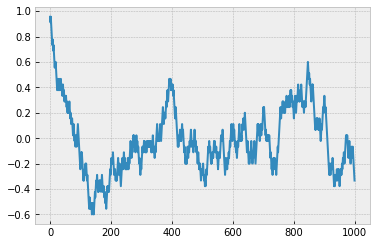

In [135]:
plt.plot(kts)

(array([  2.,   8.,  37.,  36.,  56.,  94.,  71.,  86.,  62.,  48.]),
 array([-0.2 , -0.08,  0.04,  0.16,  0.28,  0.4 ,  0.52,  0.64,  0.76,
         0.88,  1.  ]),
 <a list of 10 Patch objects>)

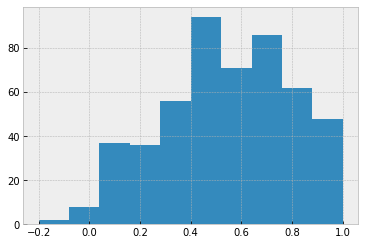

In [118]:
plt.hist(kts)

In [111]:
kts

[0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.82222222222222208,
 0.86666666666666659,
 0.95555555555555538,
 0.91111111111111098,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.95555555555555538,
 0.99999999999999989,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.95555555555555538,
 0.99999999999999989,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.82222222222222208,
 0.77777777777777768,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.82222222222222208,
 0.77777777777777768,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.82222222222222208,
 0.86666666666666659,
 0.95555555555555538,
 0.99999999999999989,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.95555555555555538,
 0.91111111111111098,
 0.86666666666666659,
 0.82222222222222208,
 0.86666666666666659,
 0.9555555

In [ ]:
def n_swaps(size, n):
    seq = list(range(size))
    